In [18]:
import pandas as pd
import requests,json
from sklearn import metrics
from toolkits.nlp import pre_cor_circ

In [19]:
def get_server_res(data, url, col_name):
    '''
    服务器接口测试程序
    传入 dict, 传出 DataFrame
    '''
    # data = {'record':[{'id':0,'title':'ss','content':'zzz'},]}
    # data = {"record":marked_human_data.iloc[:5,:3].to_dict(orient = 'records')}
    # url "http://47.93.77.19:10000/correlation_negative"
    headers={'content-type':'application/json'}
    result = requests.post(url,
                      data = json.dumps(data),
                      headers=headers, allow_redirects=True)
    # print(result.text)
    json_data = json.loads(result.text)
    parse_data = []
    elapsed_time = json_data['elapsed_time']
    for i in range(len(json_data['docs'])):
        parse_data.append([json_data['docs'][i]['id'],
                          json_data['docs'][i][col_name]])
    parse_data = pd.DataFrame(parse_data, columns = ['id', col_name])    
    return parse_data, elapsed_time

In [24]:
fiel_path = r'circ_data_tendency\20181112\circ_tendency_feedback_20181116.xlsx'

combined_data_1 = pd.read_excel(fiel_path, '0')
combined_data_2 = pd.read_excel(fiel_path, '-1')
combined_data = pd.concat([combined_data_1, combined_data_2])
combined_data['title_content'] = combined_data['title']+'。'+combined_data['content']

In [25]:
from sklearn.externals import joblib
pipeline = joblib.load("model/cbrc_chapter_tendency_1114.pkl.z")

title_content = pre_cor_circ.handle_contents(combined_data['title_content'].tolist())
local_label = pipeline.predict(title_content)
combined_data['local_label'] = local_label

print(combined_data.shape)
combined_data.head()

(400, 10)


D:\software\conda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,id,group_id,predict_label,tendency,label,title,content,publishtime,title_content,local_label
0,11967202,微信,消费服务,0,0,车辆被撞对方耍赖怎么办？看这里彻底帮你搞定！| 保险与你,来源：财险互动 如果开车正常行驶被别人撞了，对方全责，找对方赔偿就好。 可事情并不总是那么简...,2018-11-08 23:55:00,车辆被撞对方耍赖怎么办？看这里彻底帮你搞定！| 保险与你。来源：财险互动 如果开车正常行驶被...,-1
1,11915584,微博,资本市场,0,0,【板王快讯：中国平安取代贝莱德 成汇丰控股第一大股东】在最近一次增持后，中国平安已取代贝莱德...,【板王快讯：中国平安取代贝莱德 成汇丰控股第一大股东】在最近一次增持后，中国平安已取代贝莱德...,2018-11-06 18:41:26,【板王快讯：中国平安取代贝莱德 成汇丰控股第一大股东】在最近一次增持后，中国平安已取代贝莱德...,-1
2,11936030,新闻,消费服务,0,0,旅责险统保示范项目显成效,阳光产险30万元的旅游意外保险赔偿金于近日送达山东邹平孙某某的遗属。旅行社责任保险统保示...,2018-11-07 16:46:41,旅责险统保示范项目显成效。 阳光产险30万元的旅游意外保险赔偿金于近日送达山东邹平孙某某的...,-1
3,11902803,新闻,公司内部管理,0,0,香港金融科技潮起 累计募资达9.4亿美元,（原标题：香港金融科技潮起）香港金融局在金融科技周上宣布，新推出的贸易融资数码化平台——“贸...,2018-11-06 07:21:27,香港金融科技潮起 累计募资达9.4亿美元。（原标题：香港金融科技潮起）香港金融局在金融科技周...,0
4,11959788,微信,产品销售,0,0,如何像挑选口红一样为自己配置保险,今天转载一篇同事Margaret的原创文章， 日常使用的口红，是要经过挑选才能在成百上千的试...,2018-11-08 17:25:58,如何像挑选口红一样为自己配置保险。今天转载一篇同事Margaret的原创文章， 日常使用的口...,0


In [28]:
# y_pred_class = pipeline.predict(X_test)
y_pred_class = tend_data['local_label'].tolist()
y_test = tend_data['label'].tolist()
print('accuracy_score: ', metrics.accuracy_score(y_test, y_pred_class)) # 指所有分类正确的百分比
print(metrics.classification_report(y_test, y_pred_class))
print('confusion_matrix: ')
print( metrics.confusion_matrix(y_test, y_pred_class))

accuracy_score:  0.4175
             precision    recall  f1-score   support

         -1       0.17      0.69      0.27        64
          0       0.86      0.37      0.51       336

avg / total       0.75      0.42      0.48       400

confusion_matrix: 
[[ 44  20]
 [213 123]]


In [26]:
# combined_data['id'] = range(combined_data.shape[0])
combined_data['title'] = combined_data['title'].astype(str) 
combined_data['content'] = combined_data['content'].astype(str)
data = {"record":combined_data.loc[:,['id', 'title' ,'content']].to_dict(orient = 'records')}
url = "http://47.93.77.19:10000/tendency_analysis_i"
col_name = 'tendency'
parse_data, elapsed_time = get_server_res(data, url, col_name)
parse_data.columns = ['id', 'online_label']
print(parse_data.shape)
parse_data.head()

(400, 2)


,id,online_label
0,11967202,-1
1,11915584,0
2,11936030,0
3,11902803,0
4,11959788,0


In [27]:
tend_data = pd.merge(parse_data, combined_data, on = 'id', how = 'inner')
print(tend_data.shape)
tend_data.head()

(400, 11)


,id,online_label,group_id,predict_label,tendency,label,title,content,publishtime,title_content,local_label
0,11967202,-1,微信,消费服务,0,0,车辆被撞对方耍赖怎么办？看这里彻底帮你搞定！| 保险与你,来源：财险互动 如果开车正常行驶被别人撞了，对方全责，找对方赔偿就好。 可事情并不总是那么简...,2018-11-08 23:55:00,车辆被撞对方耍赖怎么办？看这里彻底帮你搞定！| 保险与你。来源：财险互动 如果开车正常行驶被...,-1
1,11915584,0,微博,资本市场,0,0,【板王快讯：中国平安取代贝莱德 成汇丰控股第一大股东】在最近一次增持后，中国平安已取代贝莱德...,【板王快讯：中国平安取代贝莱德 成汇丰控股第一大股东】在最近一次增持后，中国平安已取代贝莱德...,2018-11-06 18:41:26,【板王快讯：中国平安取代贝莱德 成汇丰控股第一大股东】在最近一次增持后，中国平安已取代贝莱德...,-1
2,11936030,0,新闻,消费服务,0,0,旅责险统保示范项目显成效,阳光产险30万元的旅游意外保险赔偿金于近日送达山东邹平孙某某的遗属。旅行社责任保险统保示...,2018-11-07 16:46:41,旅责险统保示范项目显成效。 阳光产险30万元的旅游意外保险赔偿金于近日送达山东邹平孙某某的...,-1
3,11902803,0,新闻,公司内部管理,0,0,香港金融科技潮起 累计募资达9.4亿美元,（原标题：香港金融科技潮起）香港金融局在金融科技周上宣布，新推出的贸易融资数码化平台——“贸...,2018-11-06 07:21:27,香港金融科技潮起 累计募资达9.4亿美元。（原标题：香港金融科技潮起）香港金融局在金融科技周...,0
4,11959788,0,微信,产品销售,0,0,如何像挑选口红一样为自己配置保险,今天转载一篇同事Margaret的原创文章， 日常使用的口红，是要经过挑选才能在成百上千的试...,2018-11-08 17:25:58,如何像挑选口红一样为自己配置保险。今天转载一篇同事Margaret的原创文章， 日常使用的口...,0


In [29]:
# y_pred_class = pipeline.predict(X_test)
y_pred_class = tend_data['online_label'].tolist()
y_test = tend_data['label'].tolist()
print('accuracy_score: ', metrics.accuracy_score(y_test, y_pred_class)) # 指所有分类正确的百分比
print(metrics.classification_report(y_test, y_pred_class))
print('confusion_matrix: ')
print( metrics.confusion_matrix(y_test, y_pred_class))

accuracy_score:  0.6325
             precision    recall  f1-score   support

         -1       0.27      0.75      0.40        64
          0       0.93      0.61      0.74       336

avg / total       0.82      0.63      0.68       400

confusion_matrix: 
[[ 48  16]
 [131 205]]


In [1]:
from toolkits.setup.date_time import get_day_list
from toolkits.setup import specific_func
specific_func.set_ch_pd()

import numpy as np
import pandas as pd
import os
import datetime
import time

In [2]:
today = datetime.datetime.now()
today_str = today.strftime("%Y-%m-%d")
yesterday = today - datetime.timedelta(days=1)
yesterday_str = yesterday.strftime("%Y-%m-%d")
# data_folder = r'D:\XH\OneDrive\网智天元\4 银保监会\cbirc_获取用于人工判断数据\%s'% yesterday_str
# if not os.path.exists(data_folder):
#     os.makedirs(data_folder)

print('今天是：',today.strftime("%Y-%m-%d"))
print('昨天是：',yesterday_str)
print('统计的是昨天的数据，即 %s 的数据'%yesterday_str)
# print('文件存储位置: ', data_folder)

start_day = today - datetime.timedelta(days=31) # 30 天
start_day = start_day.strftime("%Y-%m-%d") # '2018-08-12'  # 含
end_day = today_str # yesterday_str    # 含
print('start_day：',start_day)
print('end_day：',end_day)

今天是： 2018-12-18
昨天是： 2018-12-17
统计的是昨天的数据，即 2018-12-17 的数据
start_day： 2018-11-17
end_day： 2018-12-18


In [3]:
start_day = today - datetime.timedelta(days=32) # 30 天
start_day = start_day.strftime("%Y-%m-%d") # '2018-08-12'  # 含
end_day = yesterday_str    # 含
print('start_day：',start_day)
print('end_day：',end_day)

# day_select = '2018-09-09'
day_list = get_day_list(start_day, end_day)
print(day_list)

start_day： 2018-11-16
end_day： 2018-12-17
['2018-11-17', '2018-11-18', '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24', '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30', '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08', '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16', '2018-12-17']


In [4]:
proj_dic={'银监会':1,'保监会':2,'中国人寿':3,'建行北分':4,'中国人保':5,'安徽银监局':6}
proj_name_dict = {v: k for k, v in proj_dic.items()}
proj_name_dict

{1: '银监会', 2: '保监会', 3: '中国人寿', 4: '建行北分', 5: '中国人保', 6: '安徽银监局'}

In [5]:
engine = specific_func.get_engine('cbirc')

D:\software\conda\lib\site-packages\pymysql\cursors.py:166: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  result = self._query(query)


In [6]:
for t in range(5, 6):
    print('获取 %s 的数据 -------'%(proj_name_dict[t]))
    for day in day_list:
        filename = 'statistics_result/mysql_daily_count_by_condition/%s_%s_mysql_stat.xlsx'%(proj_name_dict[t], day)
        if os.path.exists(filename):
            print('   已存在：', filename)
        else :
            t0 = time.time()
            sql_cbirc = '''
            SELECT
                t2.type,
                t1.traffic_id AS classify,
                t2.sen as tendency, 
                COUNT(t1.id) AS count
            FROM
                cbrc_circ.db_classify_traffic_docinfo t1
                    LEFT JOIN
                cbrc_circ.db_docinfo_trade t2 ON t1.urlhash = t2.urlhash
                    LEFT JOIN
                cbrc_circ.db_docinfo t3 ON t2.urlhash = t3.urlhash
            WHERE
                t3.publishtime >= '{0} 00:00:00'
                AND t3.publishtime <= '{0} 23:59:59'
                    and t2.type = {1}
                    and t1.type = t2.type
            GROUP BY t2.type , t1.traffic_id, t2.sen
            '''.format(day, t)

            cbirc_count_type = pd.read_sql(sql_cbirc, engine)     
            cbirc_count_type['publishtime'] = day
            cbirc_count_type.to_excel(filename, index = False)    
            print('   日期：%s ；耗时：%s s'%(day, time.time() - t0))
            print('   已生成：', filename)

获取 中国人保 的数据 -------
   已存在： statistics_result/mysql_daily_count_by_condition/中国人保_2018-11-17_mysql_stat.xlsx
   日期：2018-11-18 ；耗时：212.97718167304993 s
   已生成： statistics_result/mysql_daily_count_by_condition/中国人保_2018-11-18_mysql_stat.xlsx
   日期：2018-11-19 ；耗时：358.8895273208618 s
   已生成： statistics_result/mysql_daily_count_by_condition/中国人保_2018-11-19_mysql_stat.xlsx
   日期：2018-11-20 ；耗时：235.25745582580566 s
   已生成： statistics_result/mysql_daily_count_by_condition/中国人保_2018-11-20_mysql_stat.xlsx
   日期：2018-11-21 ；耗时：198.47435212135315 s
   已生成： statistics_result/mysql_daily_count_by_condition/中国人保_2018-11-21_mysql_stat.xlsx
   日期：2018-11-22 ；耗时：166.40551805496216 s
   已生成： statistics_result/mysql_daily_count_by_condition/中国人保_2018-11-22_mysql_stat.xlsx
   日期：2018-11-23 ；耗时：179.07924270629883 s
   已生成： statistics_result/mysql_daily_count_by_condition/中国人保_2018-11-23_mysql_stat.xlsx
   日期：2018-11-24 ；耗时：174.7319939136505 s
   已生成： statistics_result/mysql_daily_count_by_condition/中国人保_201

In [ ]:
cbirc_count_all = pd.DataFrame()
for t in range(5, 6):
    print('获取 %s 的数据 -------'%(proj_name_dict[t]))
    for day in day_list:
        filename = 'statistics_result/mysql_daily_count_by_condition/%s_%s_mysql_stat.xlsx'%(proj_name_dict[t], day)
        if os.path.exists(filename):
            cbirc_count_type = pd.read_excel(filename)
            cbirc_count_all = pd.concat([cbirc_count_all, cbirc_count_type], axis = 0)
        else :
            print('   不存在：', filename)

In [ ]:
print(cbirc_count_all.shape)
cbirc_count_all.head()

In [ ]:
day

In [14]:
for day in day_list:
    filename = 'statistics_result/mysql_daily_count_by_condition/补录_CBIRC_%s_mysql_stat.xlsx'%(day)
    if os.path.exists(filename):
        print('   已存在：', filename)
    else :
        t0 = time.time()
        sql_cbirc = '''
        SELECT            
            t2.type,
            t1.traffic_id AS classify,
            t2.sen as tendency, 
            COUNT(t1.id) AS count,
            t2.gather_type
        FROM
            cbrc_circ.db_classify_traffic_docinfo t1
                LEFT JOIN
            cbrc_circ.db_docinfo_trade t2 ON t1.urlhash = t2.urlhash
                LEFT JOIN
            cbrc_circ.db_docinfo t3 ON t2.urlhash = t3.urlhash
        WHERE
            t3.publishtime >= '{0} 00:00:00'
            AND t3.publishtime <= '{0} 23:59:59'
                and t1.type = t2.type
                and t2.gather_type in (1,3)
        GROUP BY t2.type , t1.traffic_id, t2.sen
        '''.format(day)

        cbirc_count_type = pd.read_sql(sql_cbirc, engine)     
        cbirc_count_type['publishtime'] = day
        cbirc_count_type.to_excel(filename, index = False)    
        print('   日期：%s ；耗时：%s s'%(day, time.time() - t0))
        print('   已生成：', filename)

   日期：2018-11-17 ；耗时：3.724212884902954 s
   已生成： statistics_result/mysql_daily_count_by_condition/补录_CBIRC_2018-11-17_mysql_stat.xlsx
   日期：2018-11-18 ；耗时：1.9351110458374023 s
   已生成： statistics_result/mysql_daily_count_by_condition/补录_CBIRC_2018-11-18_mysql_stat.xlsx
   日期：2018-11-19 ；耗时：0.12900733947753906 s
   已生成： statistics_result/mysql_daily_count_by_condition/补录_CBIRC_2018-11-19_mysql_stat.xlsx
   日期：2018-11-20 ；耗时：0.14500808715820312 s
   已生成： statistics_result/mysql_daily_count_by_condition/补录_CBIRC_2018-11-20_mysql_stat.xlsx
   日期：2018-11-21 ；耗时：0.14000797271728516 s
   已生成： statistics_result/mysql_daily_count_by_condition/补录_CBIRC_2018-11-21_mysql_stat.xlsx
   日期：2018-11-22 ；耗时：0.3670210838317871 s
   已生成： statistics_result/mysql_daily_count_by_condition/补录_CBIRC_2018-11-22_mysql_stat.xlsx
   日期：2018-11-23 ；耗时：0.128007173538208 s
   已生成： statistics_result/mysql_daily_count_by_condition/补录_CBIRC_2018-11-23_mysql_stat.xlsx
   日期：2018-11-24 ；耗时：0.13500761985778809 s
   已生成： sta

In [15]:
cbirc_add_count_all = pd.DataFrame()
for day in day_list:
    filename = 'statistics_result/mysql_daily_count_by_condition/补录_CBIRC_%s_mysql_stat.xlsx'%(day)
    if os.path.exists(filename):
        cbirc_count_type = pd.read_excel(filename)
        cbirc_add_count_all = pd.concat([cbirc_add_count_all, cbirc_count_type], axis = 0)
    else :
        print('   不存在：', filename)

In [16]:
print(cbirc_add_count_all.shape)
cbirc_add_count_all.head()

(221, 6)


,type,classify,tendency,count,gather_type,publishtime
0,3,6,-1,1,1,2018-11-17
1,4,5,0,3,1,2018-11-17
0,3,6,-1,2,1,2018-11-18
1,5,10,-1,1,1,2018-11-18
0,1,6,-1,1,1,2018-11-19


In [18]:
cbirc_add_count = cbirc_add_count_all.groupby(['publishtime', 'type'])['count'].sum()
cbirc_add_count = cbirc_add_count.reset_index(['publishtime', 'type'])
cbirc_add_count['type'] = cbirc_add_count['type'].apply(lambda x:proj_name_dict[int(x)])
cbirc_add_count.head()

,publishtime,type,count
0,2018-11-17,3,1
1,2018-11-17,4,3
2,2018-11-18,3,2
3,2018-11-18,5,1
4,2018-11-19,1,3


In [23]:
print(cbirc_add_count['count'].sum())
cbirc_add_count_table = cbirc_add_count.pivot_table(index = ['publishtime'], columns = ['type'], 
                        aggfunc = [np.sum], values = ['count'], 
                        fill_value = 0, margins = True)
cbirc_add_count_table

432


sum                   
            count                   
type         中国人保 中国人寿 建行北分 银监会  All
publishtime                         
2018-11-17      0    1    3   0    4
2018-11-18      1    2    0   0    3
2018-11-19      8    1    0   3   12
2018-11-20      6    0    1   1    8
2018-11-21      7    1    1   1   10
2018-11-22     11    2    0   0   13
2018-11-23      8    0    0   0    8
2018-11-24      0    0    1   0    1
2018-11-25      2    1    0   0    3
2018-11-26      2    3   24   0   29
2018-11-27      7    1   20   1   29
2018-11-28      6    0   12   0   18
2018-11-29      9    0    7   0   16
2018-11-30     13    1   44   0   58
2018-12-01      4    1    2   0    7
2018-12-02      3    2    0   0    5
2018-12-03     11   10   22   0   43
2018-12-04      4   13    7   0   24
2018-12-05      6   11    9   0   26
2018-12-06      1    4    8   0   13
2018-12-07      2    4    7   0   13
2018-12-08      0    0    2   0    2
2018-12-09      1    0    1   0    2
2018-12-10      6    3    3   0   12
2018-12-11      2   10    2   0   14
2018-12-12      6    8    4   0   18
2018-12-13      3    8    5   0   16
2018-12-14      1    8    7   0   16
2018-12-15      0    0    2   0    2
2018-12-16      1    0    1   0    2
2018-12-17      4    0    1   0    5
All           135   95  196   6  432

In [33]:
idx = pd.IndexSlice
cbirc_add_count_table_sel = cbirc_add_count_table[cbirc_add_count_table['All']]

cbirc_add_count_table.columns

MultiIndex(levels=[['sum'], ['count'], ['All', '中国人保', '中国人寿', '建行北分', '银监会']],
           labels=[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 2, 3, 4, 0]],
           names=[None, None, 'type'])

In [45]:
cbirc_add_count_table['sum']['count']['All']

publishtime
2018-11-17      4
2018-11-18      3
2018-11-19     12
2018-11-20      8
2018-11-21     10
2018-11-22     13
2018-11-23      8
2018-11-24      1
2018-11-25      3
2018-11-26     29
2018-11-27     29
2018-11-28     18
2018-11-29     16
2018-11-30     58
2018-12-01      7
2018-12-02      5
2018-12-03     43
2018-12-04     24
2018-12-05     26
2018-12-06     13
2018-12-07     13
2018-12-08      2
2018-12-09      2
2018-12-10     12
2018-12-11     14
2018-12-12     18
2018-12-13     16
2018-12-14     16
2018-12-15      2
2018-12-16      2
2018-12-17      5
All           432
Name: All, dtype: int64

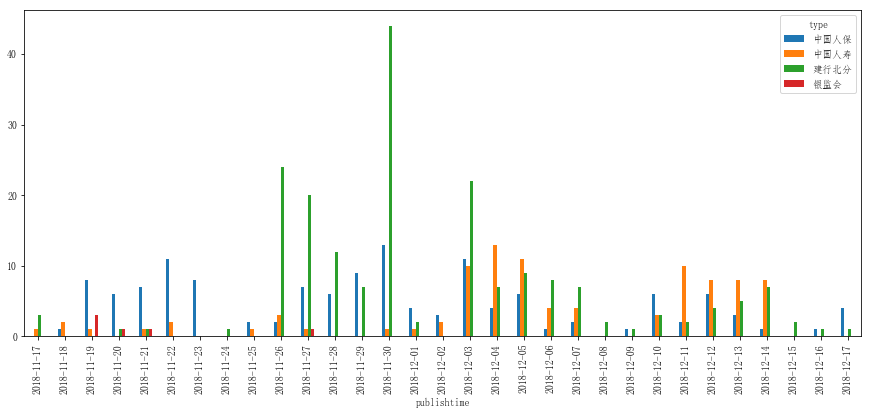

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

cbirc_add_count_table[:-1]['sum']['count'][['中国人保', '中国人寿', '建行北分', '银监会']].plot.bar(figsize = (15,6))

In [37]:
df = pd.DataFrame({'class':['A','A','A','B','B','B','C','C'],
                   'id':['a','b','c','a','b','c','a','b'],
                   'value':[1,2,3,4,5,6,7,8]})
df

,class,id,value
0,A,a,1
1,A,b,2
2,A,c,3
3,B,a,4
4,B,b,5
5,B,c,6
6,C,a,7
7,C,b,8


In [38]:
df = df.set_index(['class','id'])

In [39]:
df

value
class id       
A     a       1
      b       2
      c       3
B     a       4
      b       5
      c       6
C     a       7
      b       8